In [161]:
# imports the needed libraries and csv file. Prints the head of the dataframe as a reference
# data cleaning steps are skipped since this is a clean dataset
import pandas as pd
import matplotlib.pyplot as plt

insurance_df = pd.read_csv('insurance.csv')
print(insurance_df.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [163]:
""" 
This code will repeat through the following process multiple times:
1. choose a variable to study
2. select a control group
3. Observe the relationship between the variable and charges
4. Calculate that relationship
5. Reduce the charges and variable value so that all observations have the same variable value and minimum charged value
6. Identify the mode of each control group and fill a new column with that mode value
"""
# the variable I chose to study first was bmi (body mass index) since it was the variable with the most variation which makes it impossible to group

' \nThis code will repeat through the following process multiple times:\n1. choose a variable to study\n2. select a control group\n3. Observe the relationship between the variable and charges\n4. Calculate that relationship\n5. Reduce the charges and variable value so that all observations have the same variable value and minimum charged value\n6. Identify the mode of each control group and fill a new column with that mode value\n'

In [165]:
# Finds available control groups by aggregating data by all variables except bmi. 
bmi_groups = insurance_df.groupby(['age','sex','children','smoker','region']).bmi.count().reset_index().sort_values(by=['bmi'], ascending=False)

# Displays the largest control groups.
print(bmi_groups.head())

    age     sex  children smoker     region  bmi
0    18  female         0     no  northeast   12
1    18  female         0     no  southeast   12
33   19    male         0     no  southwest   10
32   19    male         0     no  northwest   10
10   18    male         0     no  southeast   10


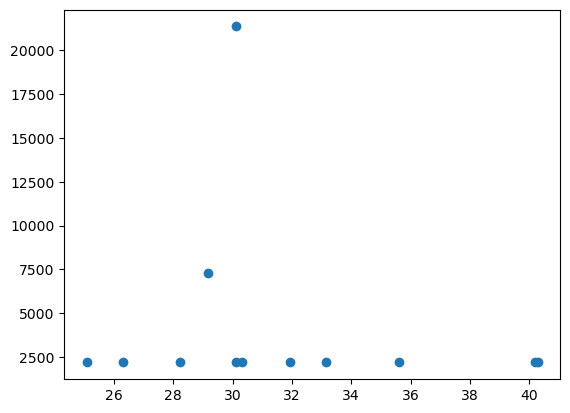

In [167]:
# Creates a sample group based on the values from one of the larger groups in bmi_groups
bmi_control_group = insurance_df[
(insurance_df.age==18)&
(insurance_df.sex=='female')&
(insurance_df.children==0)&
(insurance_df.smoker=='no')&
(insurance_df.region=='northeast')].sort_values(by=['bmi']).reset_index()

# Plots the control group to see the relationship between bmi and charges. Note that two people that are way more expensive than the rest
plt.scatter(bmi_control_group.bmi,bmi_control_group.charges)

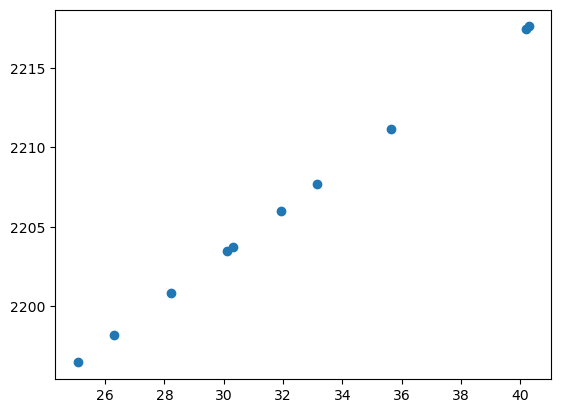

In [169]:
# Filters the control group to only show observations charged less than 3000. Now we can see a clear linear line.
bmi_control_group = bmi_control_group[bmi_control_group.charges < 3000]
plt.scatter(bmi_control_group.bmi,bmi_control_group.charges)

In [171]:
# Identifies the slope by calculating the difference between two points
bmi_diff = bmi_control_group.bmi[11] - bmi_control_group.bmi[0]
cost_diff = bmi_control_group.charges[11] - bmi_control_group.charges[0]
bmi_m = cost_diff / bmi_diff
bmi_m = bmi_m.round(2)

# Creates a new charges column with charges as if bmi was zero for everyone
reduce_bmi = lambda row: row.charges - row.bmi*bmi_m
insurance_df['charges_zero_bmi'] = insurance_df.apply(reduce_bmi, axis=1)

# reprints the control group. Check if bmi charges are now equal
bmi_control_group = insurance_df[
(insurance_df.age==18)&
(insurance_df.sex=='female')&
(insurance_df.children==0)&
(insurance_df.smoker=='no')&
(insurance_df.region=='northeast')].sort_values(by=['bmi']).reset_index()
print(bmi_control_group.head())

   index  age     sex     bmi  children smoker     region       charges  \
0    492   18  female  25.080         0     no  northeast   2196.473200   
1     31   18  female  26.315         0     no  northeast   2198.189850   
2   1163   18  female  28.215         0     no  northeast   2200.830850   
3    427   18  female  29.165         0     no  northeast   7323.734819   
4    102   18  female  30.115         0     no  northeast  21344.846700   

   charges_zero_bmi  
0       2161.612000  
1       2161.612000  
2       2161.612000  
3       7283.195469  
4      21302.986850  


In [173]:
# Removes outliers in each control group by assinging the mode value since the outliers will increasingly "muddy" the future control groups
bmi_group_mode = insurance_df.groupby(['age','sex','children','smoker','region']).charges_zero_bmi.apply(pd.Series.mode).reset_index().rename(columns={'charges_zero_bmi': 'charge_mode_bmi'})
insurance_df = pd.merge(insurance_df, bmi_group_mode, how='left')
print(insurance_df.head())

   age     sex    bmi  children smoker     region     charges  \
0   19  female  27.90         0    yes  southwest  16884.9240   
1   19  female  27.90         0    yes  southwest  16884.9240   
2   19  female  27.90         0    yes  southwest  16884.9240   
3   18    male  33.77         1     no  southeast   1725.5523   
4   28    male  33.00         3     no  southeast   4449.4620   

   charges_zero_bmi  level_5  charge_mode_bmi  
0         16846.143        0        13814.343  
1         16846.143        1        16846.143  
2         16846.143        2        17041.743  
3          1678.612        0         1678.612  
4          4403.592        0         4403.592  


In [175]:
"""
The next variable studied is sex


"""

'\nThe next variable studied is sex\n\n\n'

In [177]:
# Finds available control groups by aggregating data by all variables except bmi and sex
s_groups = insurance_df.groupby(['age','children','smoker','region']).sex.count().reset_index().sort_values(by=['sex'], ascending=False).rename(columns={'sex': 's_count'})

# Displays the largest control groups
print(s_groups.head())

    age  children smoker     region  s_count
0    18         0     no  northeast       30
16   19         0    yes  northwest       25
1    18         0     no  southeast       22
18   19         0    yes  southwest       18
15   19         0     no  southwest       18


In [179]:
# Creates a sample group based on the values from the largest control group
s_control_group1 = insurance_df[
(insurance_df.age==18)&
(insurance_df.children==0)&
(insurance_df.smoker=='no')&
(insurance_df.region=='southeast')].reset_index()

# prints the control group to see if there is a obvious mode value for each sex
print(s_control_group1[['sex','charge_mode_bmi']])

# Calculates the charges difference and multiplier between a male and a female
s_diff1 = s_control_group1.charge_mode_bmi[1] - s_control_group1.charge_mode_bmi[0]
s_mult1 = s_control_group1.charge_mode_bmi[1] / s_control_group1.charge_mode_bmi[0]

       sex  charge_mode_bmi
0     male         1089.612
1   female         1578.612
2     male         1089.612
3   female         1578.612
4   female         1578.612
5   female         1578.612
6   female         1578.612
7     male         1089.612
8   female         1578.612
9   female         1578.612
10  female         1578.612
11    male         1089.612
12    male         1089.612
13    male         1089.612
14  female         1578.612
15    male         1089.612
16  female         1578.612
17    male         1089.612
18    male         1089.612
19  female         1578.612
20    male         1089.612
21  female         1578.612


In [181]:
# Selects the observations for the second largest control group
s_control_group = insurance_df[
(insurance_df.age==18)&
(insurance_df.children==0)&
(insurance_df.smoker=='no')&
(insurance_df.region=='northeast')].reset_index()

print(s_control_group[['sex','charge_mode_bmi']])

# Calculates the charges difference and multiplier between a male and a female for the second control groups
s_diff2 = s_control_group.charge_mode_bmi[2] - s_control_group.charge_mode_bmi[3]
s_mult2 = s_control_group.charge_mode_bmi[2] / s_control_group.charge_mode_bmi[3]

#prints out the multipliers and differences of both control groups for comparison
print(s_diff1)
print(s_diff2)
print(s_mult1)
print(s_mult2)

       sex  charge_mode_bmi
0   female         2161.612
1   female         2161.612
2   female         2161.612
3     male         1672.612
4     male         1672.612
5     male         1672.612
6     male         1672.612
7     male         1672.612
8     male         1672.612
9   female         2161.612
10  female         2161.612
11  female         2161.612
12    male         1672.612
13    male         1672.612
14  female         2161.612
15    male         1672.612
16    male         1672.612
17  female         2161.612
18  female         2161.612
19    male         1672.612
20    male         1672.612
21  female         2161.612
22  female         2161.612
23    male         1672.612
24    male         1672.612
25    male         1672.612
26    male         1672.612
27    male         1672.612
28    male         1672.612
29  female         2161.612
489.0
489.0000000000002
1.448783603704805
1.2923571037395405


In [183]:
# The multiplier is discarded and the difference of 489 is kept. Females are charged 489 more
# a new charges column is created with charges as if everyone was male
reduce_s = lambda row: row.charge_mode_bmi - 489 if row.sex == 'female' else row.charge_mode_bmi
insurance_df['charges_male'] = insurance_df.apply(reduce_s, axis=1)

# Removes outliers in each control group by assinging the mode value since the outliers will increasingly "muddy" the future control groups
sex_group_mode = insurance_df.groupby(['age','children','smoker','region']).charges_male.apply(pd.Series.mode).reset_index().rename(columns={'charges_male': 'charge_mode_sex'})
insurance_df = pd.merge(insurance_df, sex_group_mode, how='left')
print(insurance_df.head())

   age     sex   bmi  children smoker     region    charges  charges_zero_bmi  \
0   19  female  27.9         0    yes  southwest  16884.924         16846.143   
1   19  female  27.9         0    yes  southwest  16884.924         16846.143   
2   19  female  27.9         0    yes  southwest  16884.924         16846.143   
3   19  female  27.9         0    yes  southwest  16884.924         16846.143   
4   19  female  27.9         0    yes  southwest  16884.924         16846.143   

   level_5  charge_mode_bmi  charges_male  level_4  charge_mode_sex  
0        0        13814.343     13325.343        0        13325.343  
1        0        13814.343     13325.343        1        16259.343  
2        0        13814.343     13325.343        2        16357.143  
3        0        13814.343     13325.343        3        16552.743  
4        0        13814.343     13325.343        4        34731.243  


In [315]:
"""
The next variable studied is region



"""

   age  children smoker     region  charges_male
0   19         0    yes  southwest     16357.143
1   18         1     no  southeast      1678.612
2   28         3     no  southeast      4403.592
3   33         0     no  northwest     21952.911
4   32         0     no  northwest      3826.712


In [185]:
# Finds available control groups by aggregating data by all variables except bmi and sex
r_groups = insurance_df.groupby(['age','children','smoker']).region.count().reset_index().sort_values(by=['region'], ascending=False).rename(columns={'region': 'r_count'})

# Displays the largest control groups
print(r_groups.head())

     age  children smoker  r_count
10    19         0    yes      218
1     18         0    yes       78
0     18         0     no       52
9     19         0     no       34
283   53         0     no       34


In [193]:
# Creates a sample group based on the values from the largest control group
r_control_group = insurance_df[
(insurance_df.age==19)&
(insurance_df.children==0)&
(insurance_df.smoker=='no')].reset_index()
print(r_control_group[['region','charge_mode_sex']].head(10))

      region  charge_mode_sex
0  northwest         1597.043
1  southwest         1214.043
2  northwest         1597.043
3  southwest         1214.043
4  northwest         1597.043
5  northwest         1597.043
6  southwest         1214.043
7  southwest         1214.043
8  northwest         1597.043
9  southwest         1214.043


In [341]:
"""
Observing sample groups allows us to know that charges for southeast = southwest, north > south, northeast > northwest
Calculating the difference between observations allow us to know that people in the northwest are charged 383 more,
and that people in the northeast are charged 583 more
"""
diff_nw = 383
diff_ne = 583

383.0
583.0


In [195]:
#creates a new charges column as if everyone lived in the south
reduce_r = lambda row: row.charge_mode_sex - 583.0 if row.region == 'northeast' else (row.charge_mode_sex - 383.0 if row.region == 'northwest' else row.charge_mode_sex)
insurance_df['charges_south'] = insurance_df.apply(reduce_r,axis=1)

# Removes outliers in each control group by assinging the mode value since the outliers will increasingly "muddy" the future control groups
r_group_mode = insurance_df.groupby(['age','children','smoker']).charges_south.apply(pd.Series.mode).reset_index().rename(columns={'charges_south': 'charge_mode_region'})
insurance_df = pd.merge(insurance_df, r_group_mode, how='left')

   age     sex   bmi  children smoker     region    charges  charges_zero_bmi  \
0   19  female  27.9         0    yes  southwest  16884.924         16846.143   
1   19  female  27.9         0    yes  southwest  16884.924         16846.143   
2   19  female  27.9         0    yes  southwest  16884.924         16846.143   
3   19  female  27.9         0    yes  southwest  16884.924         16846.143   
4   19  female  27.9         0    yes  southwest  16884.924         16846.143   

   level_5  charge_mode_bmi  charges_male  level_4  charge_mode_sex  \
0        0        13814.343     13325.343        0        13325.343   
1        0        13814.343     13325.343        0        13325.343   
2        0        13814.343     13325.343        0        13325.343   
3        0        13814.343     13325.343        0        13325.343   
4        0        13814.343     13325.343        1        16259.343   

   charges_south  level_3  charge_mode_region  
0      13325.343        0         1655

In [355]:
"""
The next variable studied is children



"""

   age  children smoker  charges_south
0   19         0    yes      16357.143
1   18         1     no       1678.612
2   28         3     no       4403.592
3   33         0     no       3662.307
4   32         0     no       3443.712


In [199]:
# Finds available control groups by aggregating data by age and smoker status
c_groups = insurance_df.groupby(['age','smoker']).children.count().reset_index().sort_values(by=['children'], ascending=False).rename(columns={'children': 'c_count'})

# Displays the largest control groups
print(c_groups.head())

    age smoker  c_count
3    19    yes      874
1    18    yes      318
19   27    yes      139
13   24    yes       96
0    18     no       68


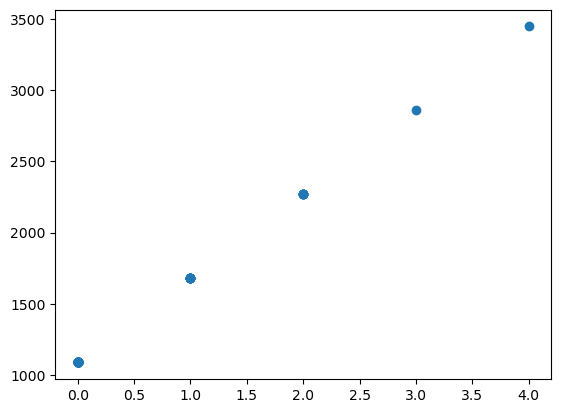

In [207]:
# creates sample group
c_control_group = insurance_df[
(insurance_df.age==18)&
(insurance_df.smoker=='no')].reset_index()

#plots the control group to identify a linear relationship
plt.scatter(c_control_group.children,c_control_group.charge_mode_region)

In [217]:
# The chart shows a linear relationship between charges and number of children, each additional child adds 589
diff_child = c_control_group.charge_mode_region[0] - c_control_group.charge_mode_region[1]
print(diff_child)

# creates a new charges column with charges as if everyone has zero children
reduce_c = lambda row: row.charge_mode_region - row.children * 589.0
insurance_df['charges_noc'] = insurance_df.apply(reduce_c,axis=1)

# Removes outliers in each control group by assinging the mode value since the outliers will increasingly "muddy" the future control groups
c_group_mode = insurance_df.groupby(['age','smoker']).charges_noc.apply(pd.Series.mode).reset_index().rename(columns={'charges_noc': 'charge_mode_children'})
insurance_df = pd.merge(insurance_df, c_group_mode, how='left')



589.0


In [453]:
"""
The next variable studied is age



"""

   age smoker  charges_noc
0   19    yes    16357.143
1   18     no     1089.612
2   28     no     2636.592
3   33     no     3662.307
4   32     no     3443.712


In [223]:
# Groups together the records to identify a good age control group
a_groups = insurance_df.groupby(['smoker']).age.count().reset_index().sort_values(by=['age'], ascending=False).rename(columns={'age': 'a_count'})

In [225]:
# creates sample group (filters out smokers)
a_control_group = insurance_df[insurance_df.smoker=='no'].reset_index()

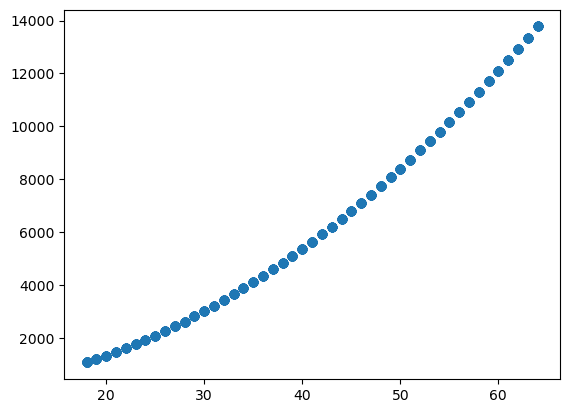

In [227]:
#plots the control group to identify a linear relationship
plt.scatter(a_control_group.age,a_control_group.charge_mode_children)

In [461]:
"""
Since the model is nonlinear I opted to use excel to find the equation for a mx^2 model
I found the equation for this slope is y = 3.363x^2
"""

In [229]:
# creates a new charges column adjusted as if everyone was 0 yrs old
reduce_a = lambda row: row.charges_noc - float(row.age**2)*3.363
insurance_df['charges_age'] = insurance_df.apply(reduce_a,axis=1)

#exports the completed file for further analysis 
insurance_df.to_csv('insurance_w_calcs.csv',index=False)

   age     sex   bmi  children smoker     region    charges  charges_zero_bmi  \
0   19  female  27.9         0    yes  southwest  16884.924         16846.143   
1   19  female  27.9         0    yes  southwest  16884.924         16846.143   
2   19  female  27.9         0    yes  southwest  16884.924         16846.143   
3   19  female  27.9         0    yes  southwest  16884.924         16846.143   
4   19  female  27.9         0    yes  southwest  16884.924         16846.143   

   level_5  charge_mode_bmi  charges_male  level_4  charge_mode_sex  \
0        0        13814.343     13325.343        0        13325.343   
1        0        13814.343     13325.343        0        13325.343   
2        0        13814.343     13325.343        0        13325.343   
3        0        13814.343     13325.343        0        13325.343   
4        0        13814.343     13325.343        0        13325.343   

   charges_south  level_3  charge_mode_region  charges_noc  level_2  \
0      13325.34

In [ ]:
"""
The next variable studied is smoker status



"""

In [231]:
#filters to only show the smoker data
smoker_only = insurance_df[insurance_df.smoker=='yes']

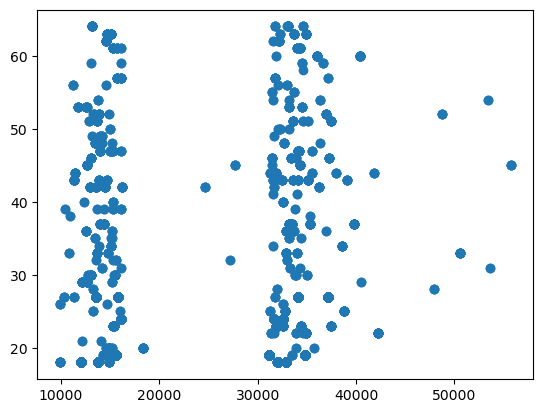

In [233]:
#shows the smoker data
plt.scatter(smoker_only.charges_age,smoker_only.age)

In [ ]:
"""
Observing the scatter plot will show that the smoker data sits relatively equally in two bubbles
Identifying a set premium for smoking alone would not be meaningful 
Other factors not provided in the CSV file likely explain this difference
In comparison, observing the scatter plot for non smokers will show only a few outliers
This helps prove that our calculation for non smokers is largely solved
"""

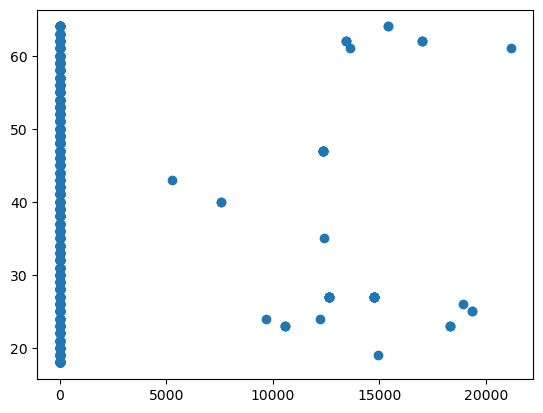

In [239]:
nonsmoker_only = insurance_df[insurance_df.smoker=='no']
plt.scatter(nonsmoker_only.charges_age,nonsmoker_only.age)

In [477]:
# Creates a formula that will calculate the insurance cost of a non-smoking individual based on the inputs provided by the CSV file
def insurance_cost(age,bmi,children,region,sex):
    s_cost = (float(age**2)*3.363)+(bmi*1.39)+(children*589.0)
    if region == 'northeast':
        s_cost += 583.0
    if region == 'northwest':
        s_cost += 383.0
    if sex == 'female':
        s_cost += 489.0
    return s_cost

In [479]:
# Prints the estimated insurance cost for two hypothetical individuals. This can be cross checked with the original file
person_1 = insurance_cost(18,33.77,1,'southeast','male')
print(person_1)

person_2 = insurance_cost(62,32.965,3,'northwest','female')
print(person_2)

1725.5523
